# PCA to Kernel PCA

Principal Component Analysis seeks to analyze a data set in terms of variance in the data.  It does so in a series of steps, looking for the largest variance in the data progressively over each step.  The initial step yields the First PCA, the next the Second PCA, and so on.  Kernel PCA does this with a high-dimensional data set, in particular one that may be non-linear in nature.  Instead of performing a non-linear analysis in the input space, it uses a non-linear kernel to translate the data and then perform a linear analysis in the feature space.

### Theory
Let's say we have a data matrix (which is also referred to as a design matrix):

$X= \begin{bmatrix}  \pmb{x_1^T}\\ \vdots \\ \pmb{x_N^T}\end{bmatrix}$ where each observation $\pmb{x}_i \in \mathbb{R}^d$ is a column vector.

We'll use the non-linear Radial Basis Functiin (RBF) kernel $k$ is defined as

$k(\pmb{x}_1, \pmb{x}_2) = exp(-\gamma \|\pmb{x}_i - \pmb{x}_j \|_2^2)$

So, given kernel function $k$, let's define our positive semi-definite, symmetric, diagonalizable Grammian matrix:

$G = \begin{bmatrix}  k(\pmb{x_1}, \pmb{x_1})   & k(\pmb{x_1}, \pmb{x_2}) &\cdots & k(\pmb{x_1}, \pmb{x_N})
\\  \vdots \\
k(\pmb{x_N}, \pmb{x_1})   & k(\pmb{x_N}, \pmb{x_2}) &\cdots & k(\pmb{x_N}, \pmb{x_N}) \end{bmatrix}$ 

We need to center the features in the feature space so we'll need 

$I$ is $N\times N$ identity matrix and 

$1_N$ is vector of 1 of length $N$ and finally

$H= I -\frac{1}{N}1_N1_N^T$ as the centralizing matrix. 

$K = HGH$ is therefore the centered matrix for $G$.

From here, we need a couple more pieces:

$U$ eigenvectors of $K$ and 

$\Lambda$ the eigenvalues of $K$  

So that we may create 

$L$ the diagonalization of $\Lambda$ eigenvalues to compute the desired projection:

$P$ = $UL^{-1/2}$


### Code Hints
There are a number of package functions in Numpy to help you with this.  Given 

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

for defining the RBF kernel function that takes X[0] and X[1] and a default gamma $\gamma$ value of 5:

    np.linalg.norm
    np.linalg.exp

will be useful.  For the Grammian Matrix, which takes $X$ and the kernel function:

    X.shape
    np.zeros
    
will come in handy.  From here, you'll find

    np.ones
    np.eye
    np.dot
    np.linalg.eigh

about all the rest you'll need to perform Kernel PCA on the test circle data.


### Begin
Let's try Kernel PCA on following dataset. It should convince you about non linear PCA.

This is a circle dataset in sklearn. Read in sklearn about this dataset.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import  PCA
from sklearn import preprocessing

Shape of X is (1000, 2)


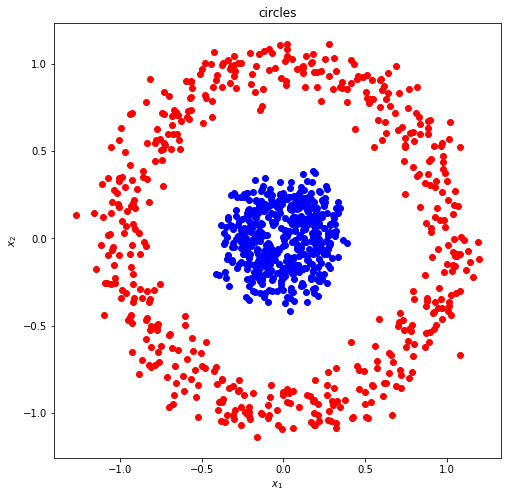

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.figure(figsize=(8,8))
print('Shape of X is {}'.format(X.shape))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red' )
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.title('circles')
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.show()

# Q1 (1 point) Build function to calculate RBF kernel

In [3]:
def rbf_kernel(x_i, x_j, gamma = 5.0):
    return np.exp(-(np.linalg.norm(x_i-x_j, 2)**2)*gamma)
    

# Q2(1 point) Build function to calculate the Grammian matrix for any given kernel function

In [4]:
def gram_matrix(X, kernel_fn = rbf_kernel):
    '''
    input X: Input point in X along rows
    kernel_fn: kernel function to apply, default rbf
    '''
    K = np.zeros((X.shape[0],X.shape[0]))
    for i,x in enumerate(X):
        for j,y in enumerate(X):
            K[i,j] = kernel_fn(x,y)
    return K

Let's compute centralizing matrix $H$

# Q3 (.5) Build matrix H, the centralizing matrix. 

In [5]:
n = X.shape[0]
I = np.identity(n)
all_ones = np.ones((n,1))
O = np.dot(all_ones,all_ones.T)/n
H = I - O
H

array([[ 0.999, -0.001, -0.001, ..., -0.001, -0.001, -0.001],
       [-0.001,  0.999, -0.001, ..., -0.001, -0.001, -0.001],
       [-0.001, -0.001,  0.999, ..., -0.001, -0.001, -0.001],
       ...,
       [-0.001, -0.001, -0.001, ...,  0.999, -0.001, -0.001],
       [-0.001, -0.001, -0.001, ..., -0.001,  0.999, -0.001],
       [-0.001, -0.001, -0.001, ..., -0.001, -0.001,  0.999]])

# Q4 (.5 point) Compute Gramming matrix and the Centralized Grammian matrix

In [6]:
gram_matrix_C = gram_matrix(X)

#Centralized Gram Matrix HKH
gram_matrix_centralized = np.dot(H, (np.dot(gram_matrix_C, H)))

# Q 5 (1  Point) Compute the projection of X into first two principle component directions in the feature space.

Note: that you have to compute eigen value and vector decomposition of centralized matrix and arrange from largest to smallest  eigen value and corresponding eigen vector.
 

In [7]:
eig_val , eig_vec = np.linalg.eig(gram_matrix_centralized)

i = np.argsort(eig_val)
i = i[::-1]

eig_vectors = eig_vec[:,i]
eig_values = eig_val[i]

d_mat = np.linalg.inv(np.diag((eig_values)))
d_mat = d_mat**0.5

projected = np.dot(gram_matrix_centralized, (np.dot(eig_vectors, d_mat)))

# Q6(.5 point) Plot the first two principle components. Use y values to color code the points. see plotting of points at the start. 

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


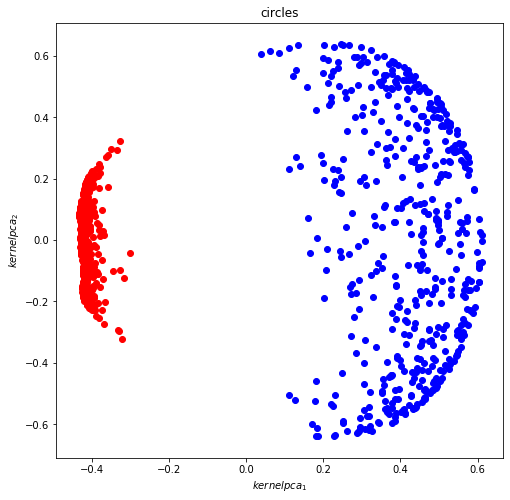

In [8]:
plt.figure(figsize=(8,8))

plt.scatter(projected[y==0, 0], projected[y==0, 1], color='red' )
plt.scatter(projected[y==1, 0], projected[y==1, 1], color='blue')
plt.title('circles')
plt.ylabel('$kernelpca_2$')
plt.xlabel('$kernelpca_1$')
plt.show()


# Q7(.5 point) Plot the first principle component. Use y values to  color code the points. see plotting of points at the start. 

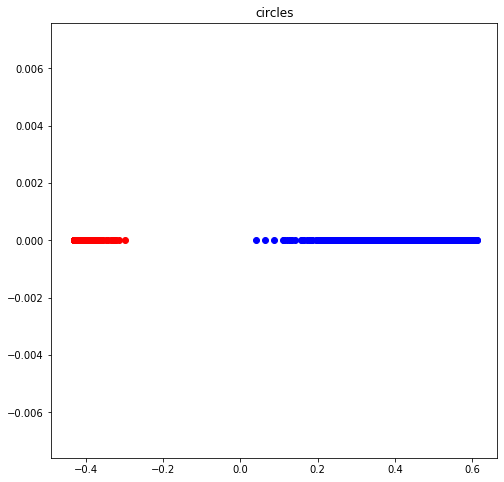

In [9]:

plt.figure(figsize=(8,8))

plt.scatter(projected[y==0, 0], np.zeros(shape = projected[y == 0,0].shape), color='red' )
plt.scatter(projected[y==1, 0], np.zeros(shape = projected[y == 1,0].shape), color='blue' )
plt.title('circles')

plt.show()

Let's compare with Linear PCA

# Q 8 (.5) Use PCA from sklearn to compute projection into first two principle component and plot them similar to question 6

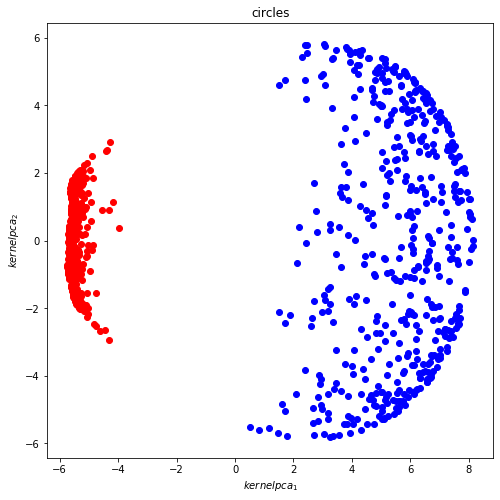

In [10]:
import sklearn
pca = PCA(n_components=1000, svd_solver='full')
pca.fit(gram_matrix_centralized)
X_pca= pca.fit_transform(gram_matrix_centralized)

plt.figure(figsize=(8,8))

plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red' )
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue')
plt.title('circles')
plt.ylabel('$kernelpca_2$')
plt.xlabel('$kernelpca_1$')
plt.show()

# Q 9 (.5) plot only first principle component(as computed in Q 7) them similar to question 7

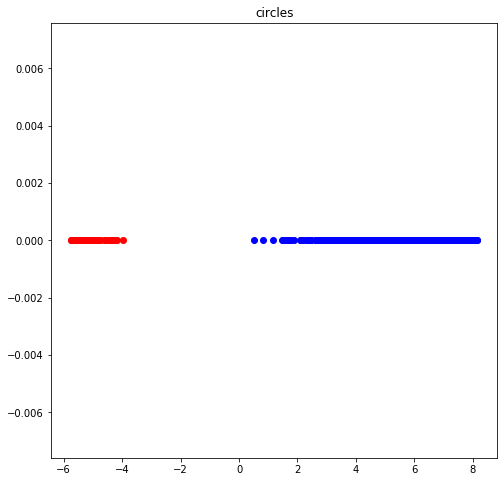

In [11]:
# write code here

plt.figure(figsize=(8,8))

plt.scatter(X_pca[y==0, 0], np.zeros(shape = X_pca[y == 0,0].shape), color='red' )
plt.scatter(X_pca[y==1, 0], np.zeros(shape = X_pca[y == 1,0].shape), color='blue' )
plt.title('circles')

plt.show()

## Here is a sample output from kernel PCA from sklearn

In [12]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma= 5.0)
projection = kpca.fit_transform(X)
projection.shape

(1000, 2)

Shape of X is (1000, 2)


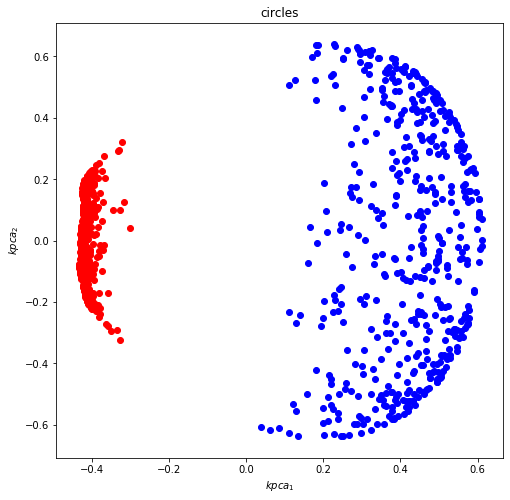

In [13]:
plt.figure(figsize=(8,8))
print('Shape of X is {}'.format(X.shape))

plt.scatter(projection[y==0, 0], projection[y==0, 1], color='red' )
plt.scatter(projection[y==1, 0], projection[y==1, 1], color='blue')
plt.title('circles')
plt.ylabel('$kpca_2$')
plt.xlabel('$kpca_1$')
plt.show()